In [154]:
import numpy as np                                                 
import pandas as pd                                                                                          
import matplotlib.pyplot as plt                                    
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Data Pre-processing

In [155]:
data=pd.read_csv('cardetail.csv')
data

,Age,City,Gender,Education Level,Occupation,Family Members,Annual Income,Charging Hours,Electric Cars are economical,Charging stations,Convert your car to all electric,Hybrid or Both,Next car will be electric car?
0,29,Kolkata,Male,Postgraduate,Working Professional,5,150000,1,Yes,15,Yes,Hybrid car,5
1,29,Mumbai,Male,Graduate,Working Professional,4,1000000,1,Yes,8,Yes,Electric car,5
2,25,Mumbai,Male,Graduate,Working Professional,4,5000,5,Yes,15,Didn't think about it,Hybrid car,5
3,25,Bangalore,Male,Graduate,Working Professional,4,750000,1,Don't know,8,Didn't think about it,Hybrid car,5
4,21,Mumbai,Male,Postgraduate,Student,4,5000,12,Don't know,15,Didn't think about it,Hybrid car,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,19,Mumbai,Male,Graduate,Working Professional,4,750000,1,Yes,8,Yes,Hybrid car,5
295,21,Bangalore,Male,Graduate,Working Professional,4,750000,1,Yes,30,Yes,Hybrid car,5
296,23,"Panaji, goa",Male,Graduate,Working Professional,3,750000,1,Yes,8,Didn't think about it,Electric car,5
297,25,Mumbai,Male,Graduate,Working Professional,2,750000,1,Yes,15,Didn't think about it,Hybrid car,3


# Descriptive Analysis

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Age                               299 non-null    int64 
 1   City                              299 non-null    object
 2   Gender                            299 non-null    object
 3   Education Level                   299 non-null    object
 4   Occupation                        299 non-null    object
 5   Family Members                    299 non-null    int64 
 6   Annual Income                     299 non-null    int64 
 7   Charging Hours                    299 non-null    int64 
 8   Electric Cars are economical      299 non-null    object
 9   Charging stations                 299 non-null    int64 
 10  Convert your car to all electric  299 non-null    object
 11  Hybrid or Both                    299 non-null    object
 12  Next car will be elect

In [157]:
#the unique values of variable
data.nunique()

Age                                 33
City                                28
Gender                               3
Education Level                      4
Occupation                           3
Family Members                       6
Annual Income                        4
Charging Hours                       8
Electric Cars are economical         3
Charging stations                    4
Convert your car to all electric     3
Hybrid or Both                       2
Next car will be electric car?       4
dtype: int64

In [158]:
for col in data.columns:
    unique_values = np.unique(data[col])
    print(f'Unique values in {col}: {unique_values}')

Unique values in Age : [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 33 35 36 37 38 39 40 41 43
 45 47 48 49 51 53 54 55 57]
Unique values in City: ['Ajmer' 'BANARAS' 'Bangalore' 'Bankapur' 'Bargarh' 'Bhubaneswar' 'Delhi'
 'Gurgaon' 'Howrah' 'Hyderabad' 'Karnal' 'Kolkata' 'Lucknow' 'MUMBAI'
 'Mumbai' 'Nagpur' 'Nandurbar' 'Navi Mumbai' 'Panaji, goa' 'Patna'
 'Raipur' 'Siliguri' 'Sultanpur' 'Thiruvananthapuram' 'Trivandrum'
 'Varanasi' 'Warangal' 'burla']
Unique values in Gender: ['5000' 'Female' 'Male']
Unique values in Education Level: ['Above Postgraduate' 'Graduate' 'High School/ Intermediate'
 'Postgraduate']
Unique values in Occupation: ['Other' 'Student' 'Working Professional']
Unique values in Family Members: [2 3 4 5 6 7]
Unique values in Annual Income: [   5000  150000  750000 1000000]
Unique values in Charging Hours: [ 1  2  3  4  5  6 10 12]
Unique values in Electric Cars are economical: ["Don't know" 'No' 'Yes']
Unique values in Charging stations: [ 8 15 25 30]
Unique values

In [159]:
data.describe()

,Age,Family Members,Annual Income,Charging Hours,Charging stations,Next car will be electric car?
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,33.066890,3.816054,603812.709030,3.685619,13.026756,4.986622
std,10.390474,0.949890,387815.052751,2.697531,6.631678,2.965091
min,17.000000,2.000000,5000.000000,1.000000,8.000000,1.000000
25%,23.000000,3.000000,150000.000000,2.000000,8.000000,3.000000
50%,31.000000,4.000000,750000.000000,2.000000,8.000000,5.000000
75%,42.000000,4.000000,1000000.000000,5.000000,15.000000,5.000000
max,57.000000,7.000000,1000000.000000,12.000000,30.000000,10.000000


array([[<AxesSubplot:title={'center':'Age '}>,
        <AxesSubplot:title={'center':'Family Members'}>],
       [<AxesSubplot:title={'center':'Annual Income'}>,
        <AxesSubplot:title={'center':'Charging Hours'}>],
       [<AxesSubplot:title={'center':'Charging stations'}>,
        <AxesSubplot:title={'center':'Next car will be electric car?'}>]],
      dtype=object)

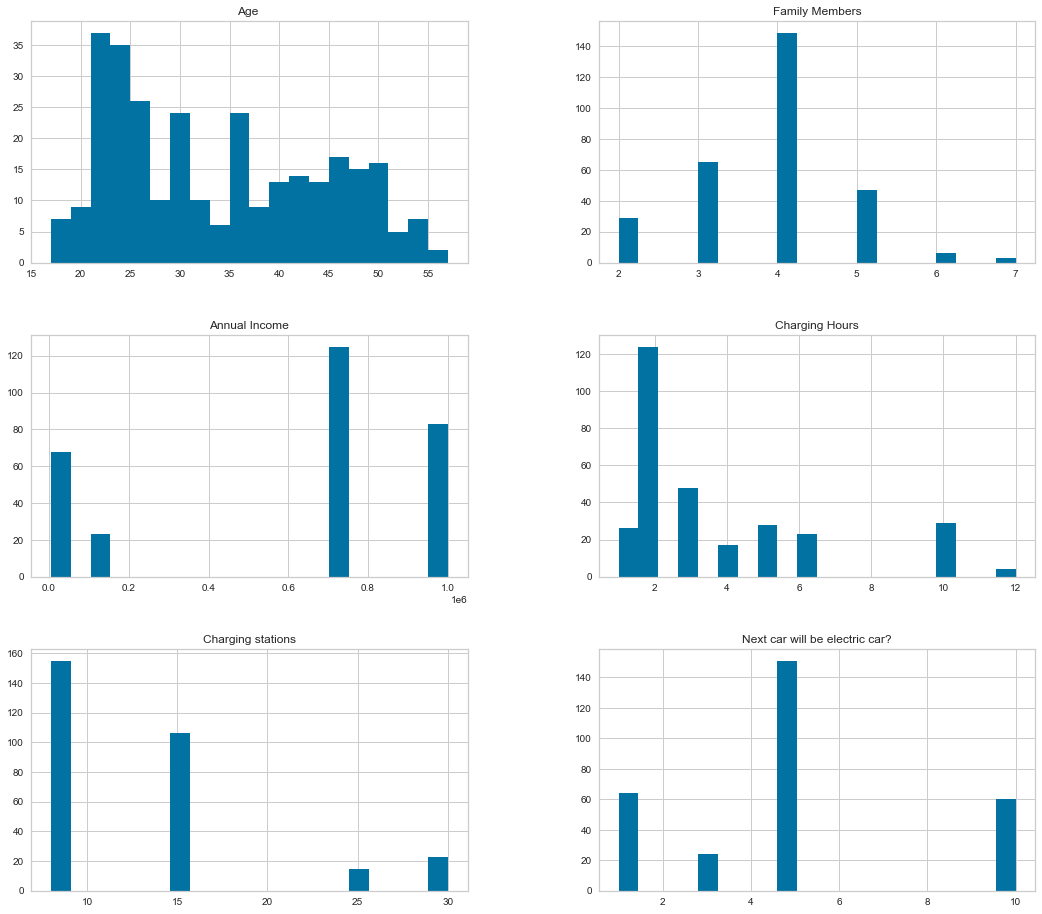

In [160]:
data.hist(bins=20,figsize=(18, 16))

# Geographical Analysis

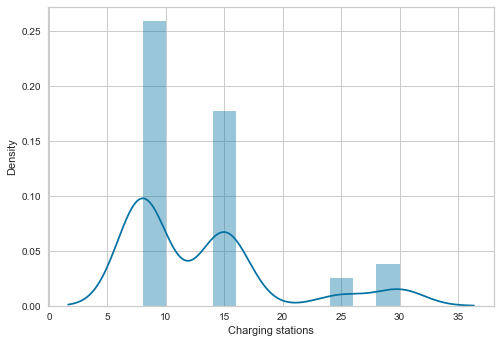

In [161]:
sns.distplot(data['Charging stations']);

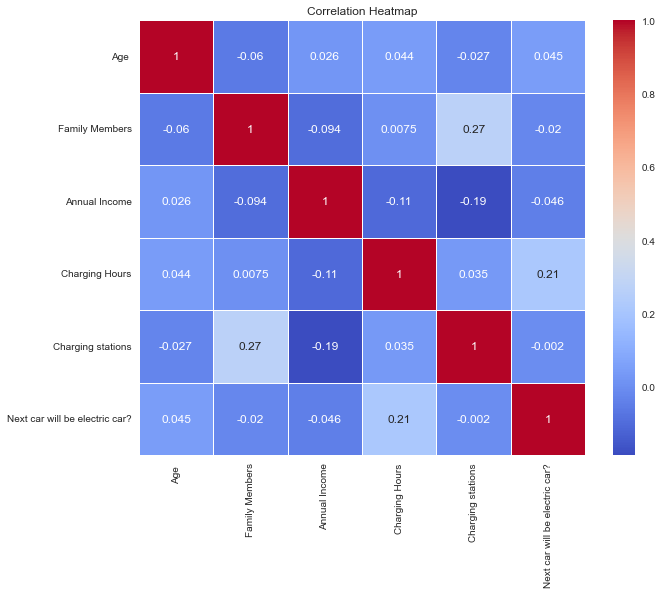

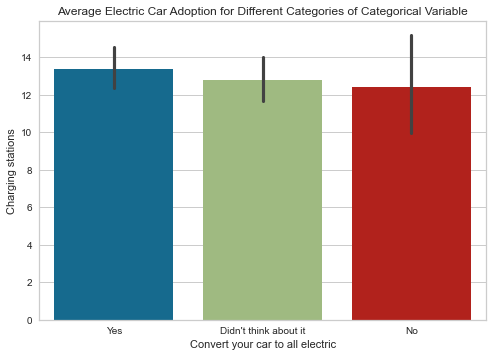

In [162]:
# Step 3: Correlation Analysis
correlation_matrix = data.corr()

# Step 4: Visualization

# Heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Bar plot to visualize the average electric car adoption for different categories of a categorical variable
sns.barplot(x='Convert your car to all electric', y='Charging stations', data=data)
plt.title('Average Electric Car Adoption for Different Categories of Categorical Variable')
plt.show()

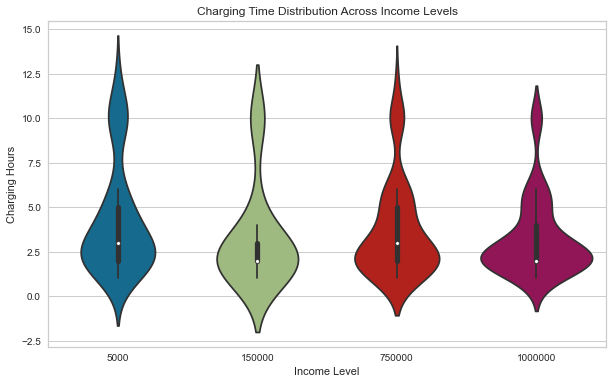

In [163]:
# Example: Violin plot for charging time distribution across different income levels
plt.figure(figsize=(10, 6))
sns.violinplot(x='Annual Income', y='Charging Hours', data=data)
plt.xlabel('Income Level')
plt.ylabel('Charging Hours')
plt.title('Charging Time Distribution Across Income Levels')
plt.show()

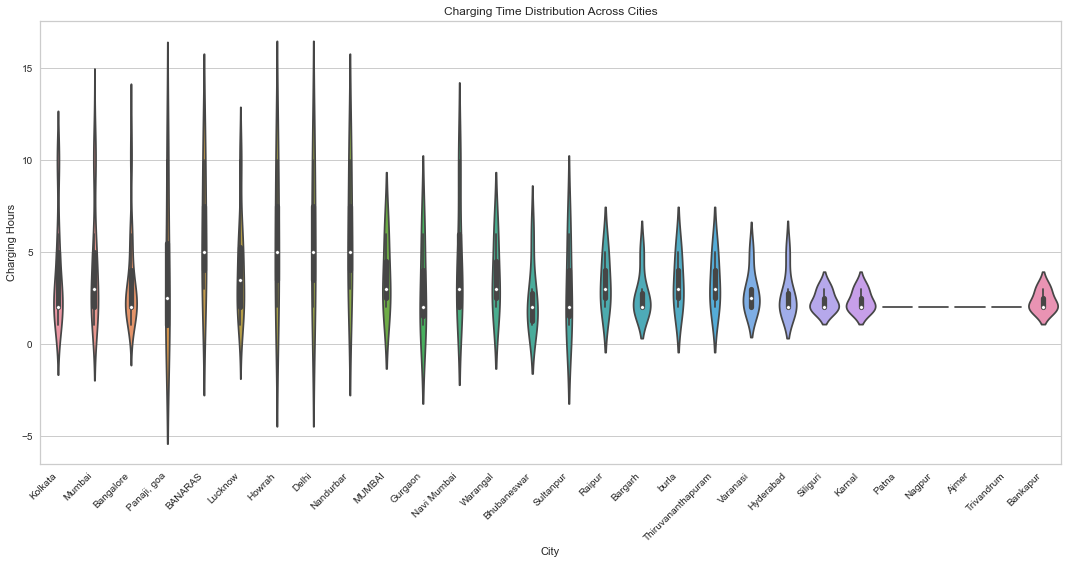

In [164]:
# Set a larger figure size to accommodate the city axis
plt.figure(figsize=(15, 8))

# Create the violin plot for charging time distribution across different cities
sns.violinplot(x='City', y='Charging Hours', data=data)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('City')
plt.ylabel('Charging Hours')
plt.title('Charging Time Distribution Across Cities')
plt.tight_layout()  # Adjust the layout to prevent label cutoff
plt.show()

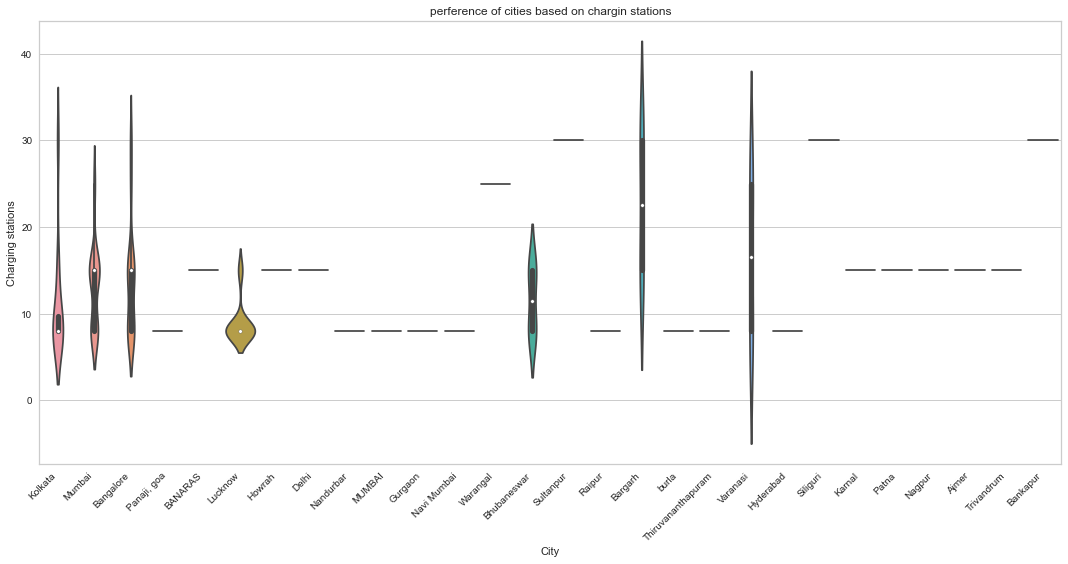

In [165]:
# Set a larger figure size to accommodate the city axis
plt.figure(figsize=(15, 8))

# Create the violin plot for charging time distribution across different cities
sns.violinplot(x='City', y='Charging stations', data=data)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('City')
plt.ylabel('Charging stations')
plt.title('perference of cities based on chargin stations')
plt.tight_layout()  # Adjust the layout to prevent label cutoff
plt.show()

# Socio-Demographic Segmentation

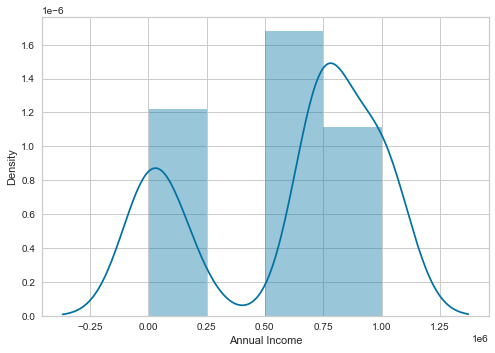

In [166]:
sns.distplot(data['Annual Income']);

<Figure size 720x432 with 0 Axes>

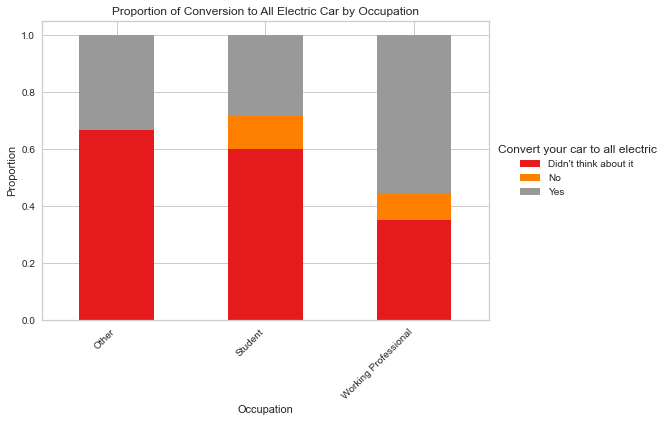

In [167]:
# Calculate the proportion of 'Convert your car to all electric' for each occupation
conversion_proportion_by_occupation = data.groupby('Occupation')['Convert your car to all electric'].value_counts(normalize=True).unstack()

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
conversion_proportion_by_occupation.plot(kind='bar', stacked=True, colormap='Set1')
plt.xlabel('Occupation')
plt.ylabel('Proportion')
plt.title('Proportion of Conversion to All Electric Car by Occupation')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Convert your car to all electric', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

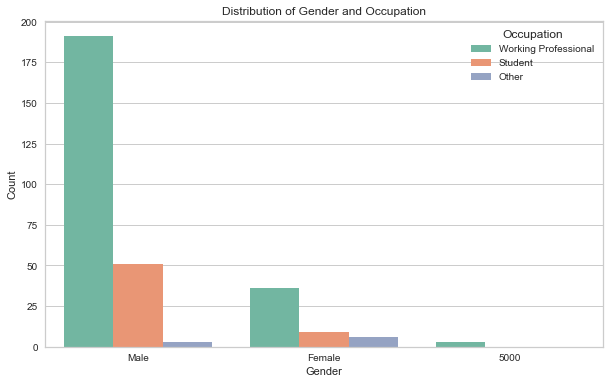

In [168]:
# Create the grouped bar plot with color coding for occupation
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Occupation', data=data, palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender and Occupation')
plt.legend(title='Occupation', loc='upper right')
plt.show()

# Behavioural Segmentation

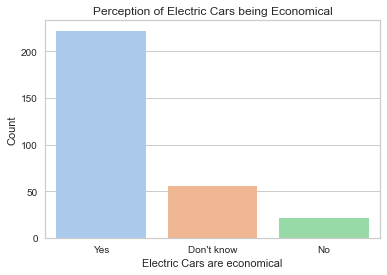

economical_counts: Yes           222
Don't know     56
No             21
Name: Electric Cars are economical, dtype: int64


In [169]:
economical_counts = data['Electric Cars are economical'].value_counts()
# Create the bar plot for counts
plt.figure(figsize=(6, 4))
sns.countplot(x='Electric Cars are economical', data=data, palette='pastel')
plt.xlabel('Electric Cars are economical')
plt.ylabel('Count')
plt.title('Perception of Electric Cars being Economical')
plt.show()
print("economical_counts:",economical_counts)

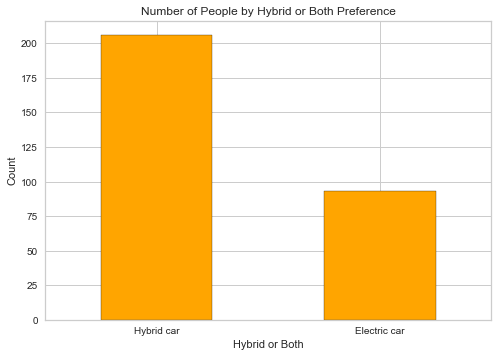

In [170]:
data['Hybrid or Both'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Hybrid or Both')
plt.ylabel('Count')
plt.title('Number of People by Hybrid or Both Preference')
plt.xticks(rotation=0)  # Set rotation to 0 for x-axis labels
plt.show()

# Insights

'Age' variable is normally distributed . Most of the people come from 20-25 age group.

Average number of family number is 4

Most of the people prefer 2 hrs of charging for their electrical vehcile

Most of the cities have atleast 10 -15 charging stations

cities with 'Howrah', 'delhi' and 'Nandurbar' people prefer atleast 5 hrs of charging hrs

Most people prefer Hybrid car and most people believe that electric vehcile is economically used

Most of the male gender category are working professionals and prefer electrical car in future

Most of them earn between 15k-75k and prefer 2 hrs of charging period.


considering 'Age','Gender','Annual income','charging hrs','charging stations','next car will be electrical'

In [171]:
data = data[data['Gender'].isin(['Male', 'Female'])]

In [172]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['Electric Cars are economical'] = label_encoder.fit_transform(data['Electric Cars are economical'])

In [173]:
data

,Age,City,Gender,Education Level,Occupation,Family Members,Annual Income,Charging Hours,Electric Cars are economical,Charging stations,Convert your car to all electric,Hybrid or Both,Next car will be electric car?
0,29,Kolkata,1,Postgraduate,2,5,150000,1,2,15,Yes,Hybrid car,5
1,29,Mumbai,1,Graduate,2,4,1000000,1,2,8,Yes,Electric car,5
2,25,Mumbai,1,Graduate,2,4,5000,5,2,15,Didn't think about it,Hybrid car,5
3,25,Bangalore,1,Graduate,2,4,750000,1,0,8,Didn't think about it,Hybrid car,5
4,21,Mumbai,1,Postgraduate,1,4,5000,12,0,15,Didn't think about it,Hybrid car,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,19,Mumbai,1,Graduate,2,4,750000,1,2,8,Yes,Hybrid car,5
295,21,Bangalore,1,Graduate,2,4,750000,1,2,30,Yes,Hybrid car,5
296,23,"Panaji, goa",1,Graduate,2,3,750000,1,2,8,Didn't think about it,Electric car,5
297,25,Mumbai,1,Graduate,2,2,750000,1,2,15,Didn't think about it,Hybrid car,3


In [174]:
df = data.copy()

# Drop the specified columns from the new DataFrame
columns_to_drop = ['City', 'Education Level', 'Family Members', 'Convert your car to all electric',
                   'Hybrid or Both', 'Next car will be electric car?']
df.drop(columns=columns_to_drop, inplace=True)

In [175]:
df.head(1)

,Age,Gender,Occupation,Annual Income,Charging Hours,Electric Cars are economical,Charging stations
0,29,1,2,150000,1,2,15


In [176]:
df.shape

(296, 7)

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your DataFrame with the predictor variables (exclude the target variable, if any)
predictors = df.drop(columns=['Electric Cars are economical'])  # Replace 'Target_Variable' with the name of your target variable, if any

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data['Variable'] = predictors.columns
vif_data['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

# Display the VIF values
print(vif_data)

            Variable        VIF
0               Age    8.242577
1             Gender   5.382705
2         Occupation  12.156029
3      Annual Income   3.909248
4     Charging Hours   2.724976
5  Charging stations   4.245761


In [178]:
#Dropping 'Occupation' because of high multicollinearity
df.drop(columns='Occupation', inplace=True)

# Extracting Segments

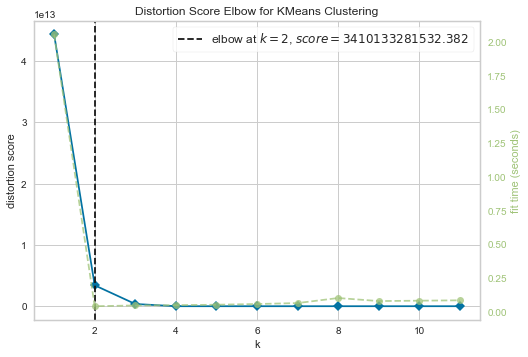

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [179]:
#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()

In [180]:
#fitting k=2
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df)

In [181]:
#Assign the cluster labels back to the original DataFrame if needed
df['Cluster'] = clusters

# Step 5: Explore the clustering results
print(df['Cluster'].value_counts())

0    205
1     91
Name: Cluster, dtype: int64


In [182]:
#fitting k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df)

In [183]:
#Assign the cluster labels back to the original DataFrame if needed
df['Cluster'] = clusters

# Step 5: Explore the clustering results
print(df['Cluster'].value_counts())

0    125
1     91
2     80
Name: Cluster, dtype: int64


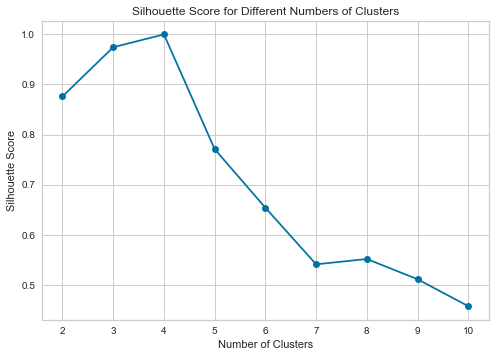

In [184]:
from sklearn.metrics import silhouette_score
max_clusters = 10  # Set the maximum number of clusters to evaluate
silhouette_scores = []

for num_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, clusters))

# Step 3: Plot the Silhouette Score for different numbers of clusters
import matplotlib.pyplot as plt

plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

we can see the highest is at k=4 and this might be overfitting if we keep increasing the values of k that means the clusters become smaller and smaller and closer together . If we have big cluster we subgroup into smaller clusters we will see the mean nearest cluster is actually decreasing because each point is closer to other clusters as well so it take care of overfitting to some extent

In [185]:
#fitting k=3
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df)

In [186]:

df['Cluster'] = clusters

# Step 5: Explore the clustering results
print(df['Cluster'].value_counts())

0    125
2     80
1     68
3     23
Name: Cluster, dtype: int64


# Profiling segments

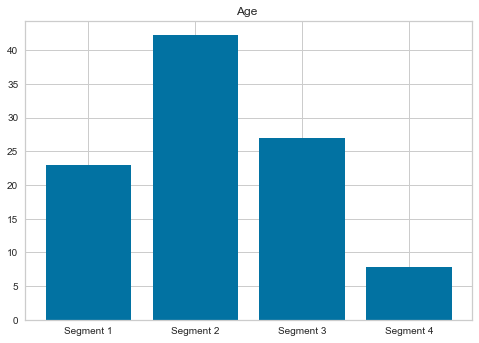

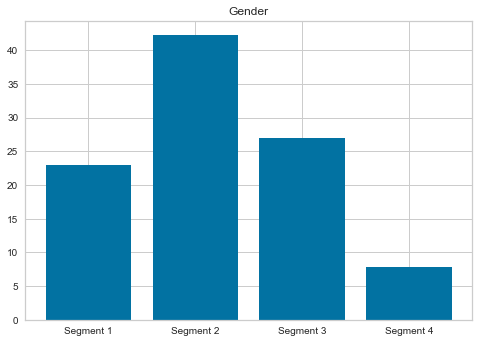

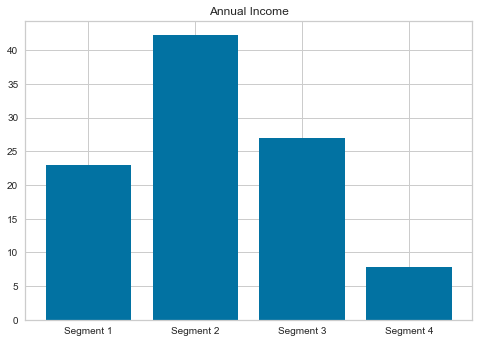

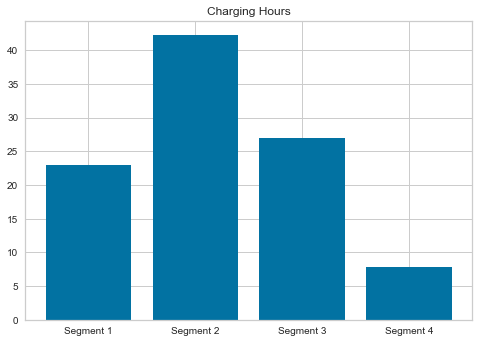

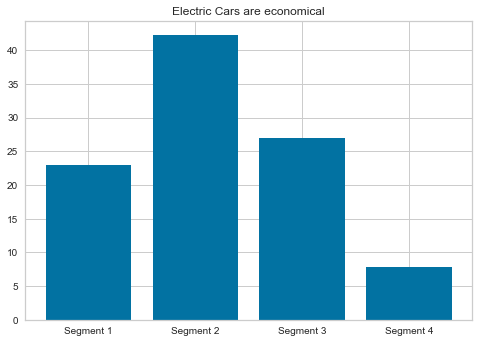

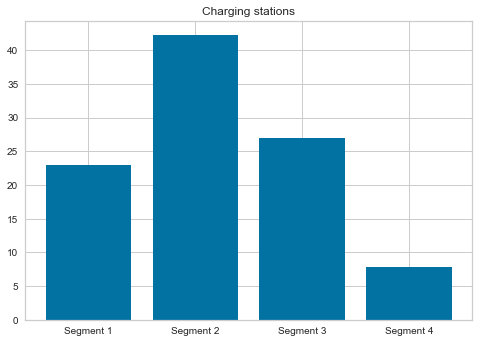

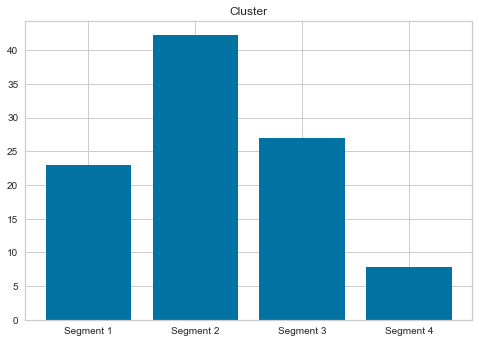

In [187]:
from sklearn.cluster import KMeans

# Perform k-means clustering on the data with k = 4
kmeans = KMeans(n_clusters=4, random_state=0).fit(df)

# Create a dictionary to store the segment profile for each attribute
segment_profile = {}
for attribute in df.columns:
    segment_profile[attribute] = []
    for cluster in range(4):
        segment_profile[attribute].append(np.mean(kmeans.labels_ == cluster) * 100)

# Plot the segment profile for each attribute
# Plot the segment profile for each attribute
for attribute in segment_profile:
    plt.bar(range(1, 5), segment_profile[attribute])
    plt.xticks(range(1, 5), ["Segment 1", "Segment 2", "Segment 3", "Segment 4"])
    plt.title(attribute)
    plt.show()

In [188]:
df

,Age,Gender,Annual Income,Charging Hours,Electric Cars are economical,Charging stations,Cluster
0,29,1,150000,1,2,15,3
1,29,1,1000000,1,2,8,2
2,25,1,5000,5,2,15,1
3,25,1,750000,1,0,8,0
4,21,1,5000,12,0,15,1
...,...,...,...,...,...,...,...
294,19,1,750000,1,2,8,0
295,21,1,750000,1,2,30,0
296,23,1,750000,1,2,8,0
297,25,1,750000,1,2,15,0


# Describing segments

In [189]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Convert 'Convert your car to all electric' column to numeric labels
data['Convert your car to all electric'] = label_encoder.fit_transform(data['Convert your car to all electric'])

# Convert 'Hybrid or Both' column to numeric labels
data['Hybrid or Both'] = label_encoder.fit_transform(data['Hybrid or Both'])

# Print the unique labels for each column
print("Unique values in Convert your car to all electric:", label_encoder.classes_)
print("Unique values in Hybrid or Both:", label_encoder.classes_)

Unique values in Convert your car to all electric: ['Electric car' 'Hybrid car']
Unique values in Hybrid or Both: ['Electric car' 'Hybrid car']


In [190]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [191]:
cross_tab = pd.crosstab(df['Cluster'], data['Hybrid or Both'])
cross_tab

Hybrid or Both,0,1
Cluster,,
0,40,85
1,24,44
2,19,61
3,10,13


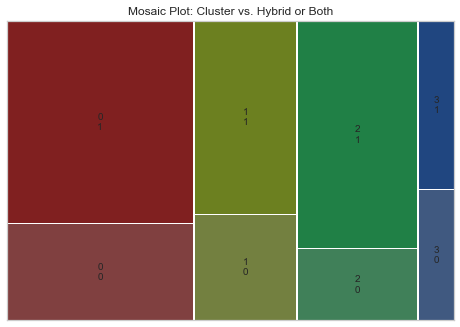

In [192]:
mosaic(cross_tab.stack(), title='Mosaic Plot: Cluster vs. Hybrid or Both', axes_label=False)

# Show the plot
plt.show()

In [193]:
cross_tab_convert= pd.crosstab(df['Cluster'], data['Convert your car to all electric'])
cross_tab_convert

Convert your car to all electric,0,1,2
Cluster,,,
0,57,18,50
1,41,3,24
2,15,7,58
3,10,0,13


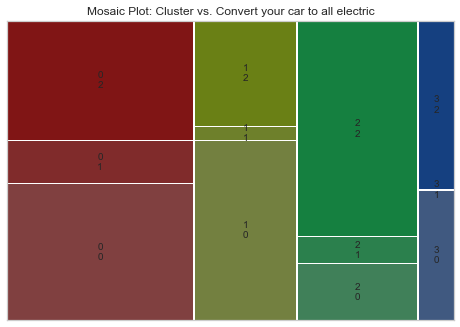

In [135]:
# Plot the mosaic plot
mosaic(cross_tab_convert.stack(), title='Mosaic Plot: Cluster vs. Convert your car to all electric', axes_label=False)

# Show the plot
plt.show()

# Target Segments

The target for the project is designed is designed to know the preference of customers who wanted to buy an electric car in future. It considers the attributes 'like','age','gender','city','charging hours','charging stations' and so on to segment the target variable.Identifying the target market is part of the process of creating and refining a new product.
A target market can be translated into a profile of the consumer to whom a product is most likely to appeal. The profile considers four main characteristics of that person: demographic, geographic, psychographic, and behavioral.

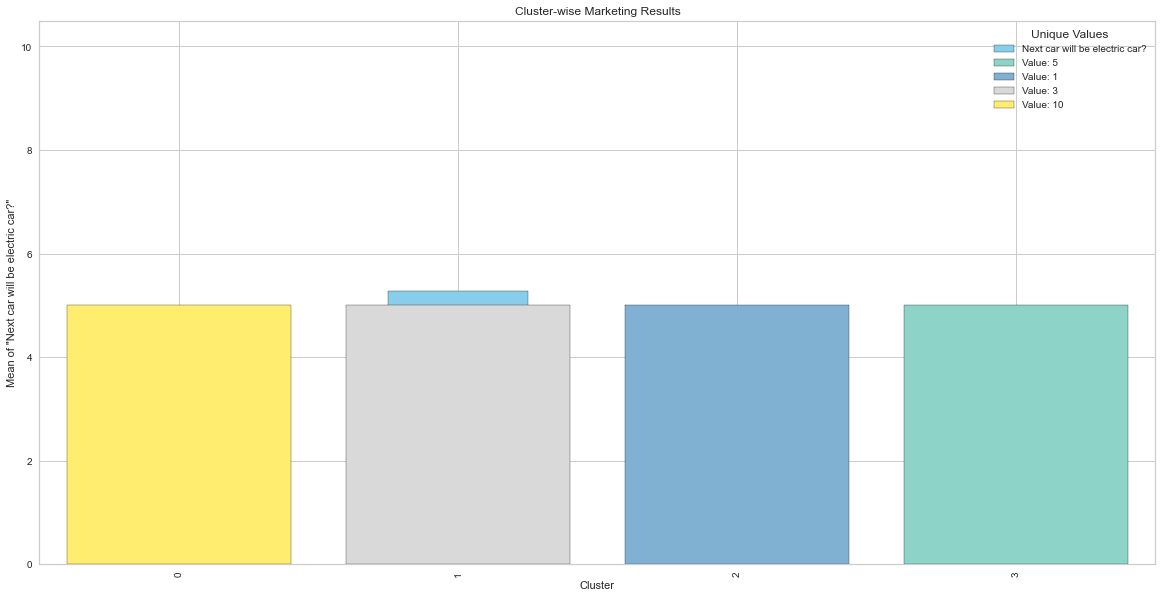

In [194]:
# Group the DataFrame 'data' by 'Cluster' from 'df' and calculate the mean of 'Next car will be electric car?'
cluster_car_mean = data.groupby(df['Cluster'])['Next car will be electric car?'].mean()

# Create a bar plot with different colors for each unique value in 'Next car will be electric car?'
ax = cluster_car_mean.plot(kind='bar', figsize=(20, 10), color='skyblue', edgecolor='black')

# Get the unique values in 'Next car will be electric car?'
unique_values = data['Next car will be electric car?'].unique()

# Create a colormap with a unique color for each unique value
colormap = plt.cm.get_cmap('Set3', len(unique_values))

# Add bars with different colors for each unique value in 'Next car will be electric car?'
for i, value in enumerate(unique_values):
    cluster_indices = data[df['Cluster'] == i].index
    ax.bar(cluster_indices, data.loc[cluster_indices, 'Next car will be electric car?'],
           color=colormap(i), label=f'Value: {value}', edgecolor='black')

# Set labels and title
plt.title('Cluster-wise Marketing Results')
plt.xlabel('Cluster')
plt.ylabel('Mean of "Next car will be electric car?"')

# Add a legend to show the unique values
ax.legend(title='Unique Values', loc='upper right')

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

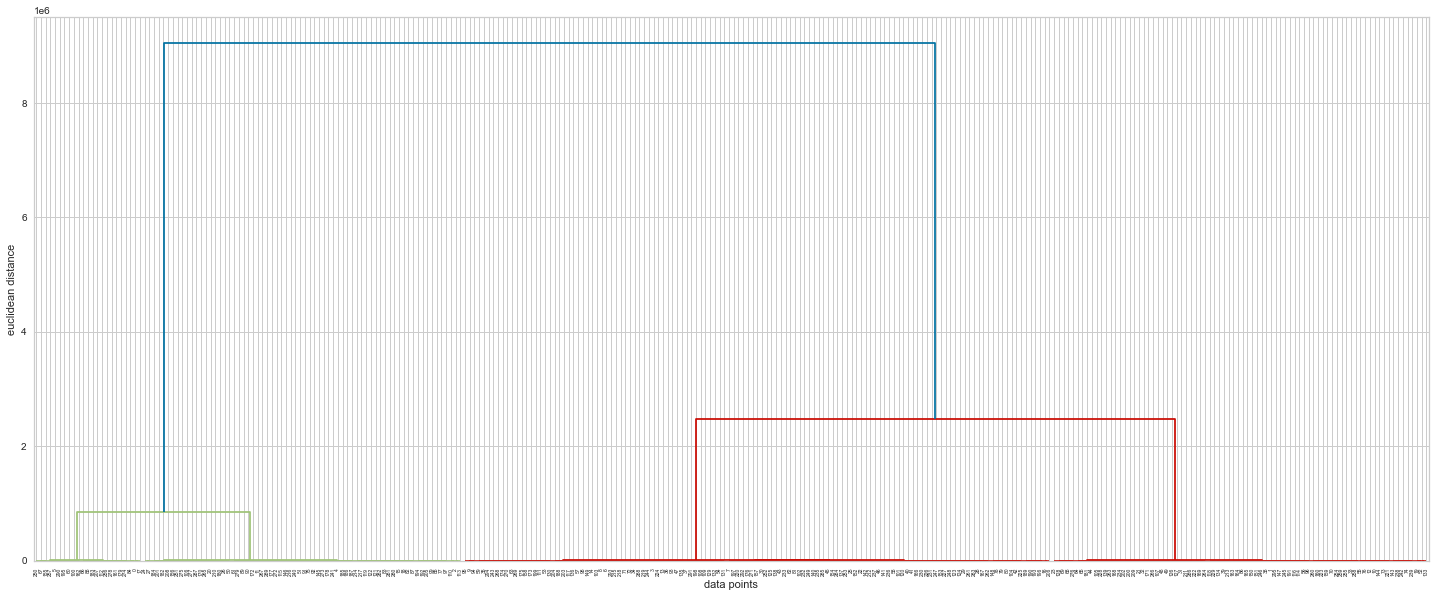

In [201]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
model = df
merg = shc.linkage(model,method="ward")
plt.figure(figsize=(25,10))
shc.dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show

 The dendrogram reveals a hierarchical structure in the data, with two main clades representing the initial broad clusters and four final clusters obtained by further dividing those two clusters.

Although the dendrogram shows two main branches, the data has been successfully segmented into four distinct clusters based on the chosen distance threshold 